# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. As a job seeker, use these insights to help find the best job opportunities.

## Final Deliverables:

 - Create Jupyter Notebookss (showcasing core skills in Python).
 - Create a summary page (via [README.md](README.md)) capturing your findings.
 - Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

NOTE: I will be focusing on US Data Analyst roles, but the code can be adapted to any of the following:

## Exploratory Data Analysis for Data Analysts in the US

In [2]:
# Import libraries/modules
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & convert 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)) 

### Filter for US Data Analyst Roles

In [3]:
# Filter for 'Data Analyst' jobs and jobs from the USA
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

### Locations to Explore

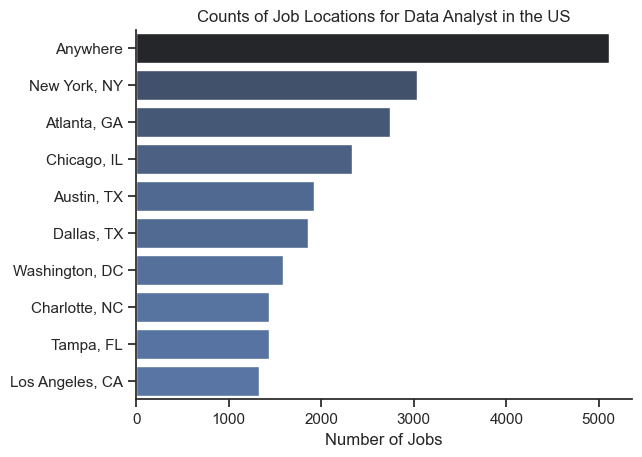

In [4]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

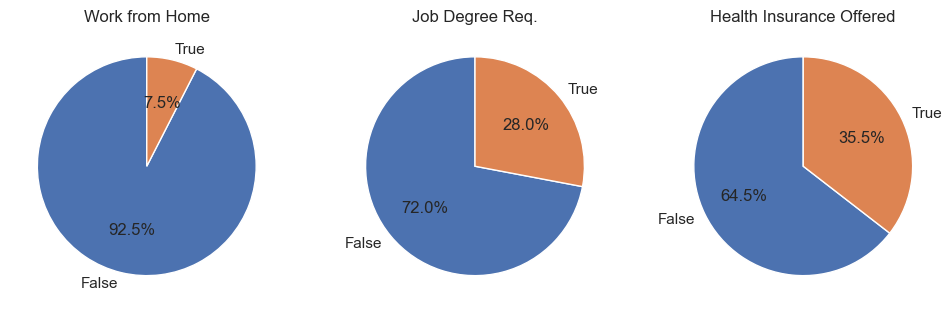

In [5]:
# Plotting the pie charts of the 3 columns above on 1 figure:
fig, ax = plt.subplots(1, 3) # 1 row, 3 columns
fig.set_size_inches(12,5)

# Define dictionary with Column Name and Header Name - will be used in loop
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True']) # We are using the matplotlib method of plotting (change this)
    # Also, i had to specify the order of the labels (F, T). I could easily make a mistake doing this and swap the order. Is there a way I could automate this?
    ax[i].set_title(title)

plt.show()

### Companies to Explore

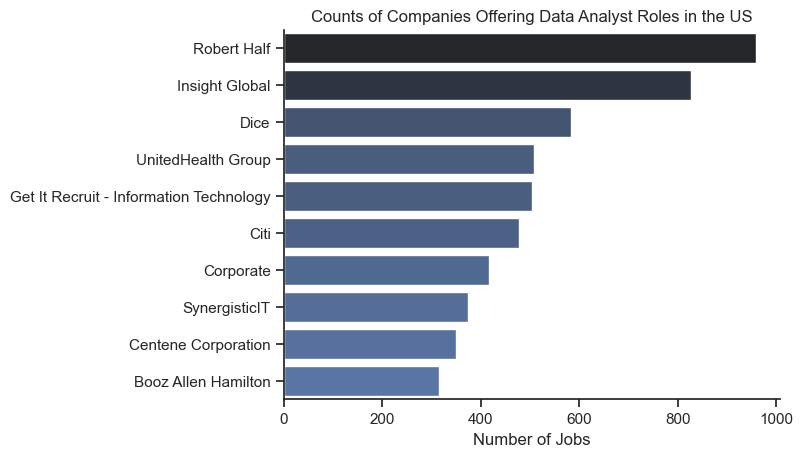

In [8]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Counts of Companies Offering Data Analyst Roles in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()